In [1]:
 import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

### Reading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

There are 2 CSV files — Train, Test.
The Train file contains 11 independent variables and 1 target variable, i.e., Item_Outlet_Sales.
The Test file also contains the same set of independent variables, 
but there is no target variable.

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

The shape i.e. the dimensions of the train dataset is 8523 and 12, meaning that it has 8523 rows and12 columns. The test dataset has 5681 rows and 11 columns. Shape shows the rows and columns of an dataset.

In [4]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.info()
#There are 7 categorical columns in the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()
#There are 7 categorical values in the test dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


There are 4 numeric and 7 categorical variables.

# Exploratory Data Analysis (EDA)



In [8]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [9]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

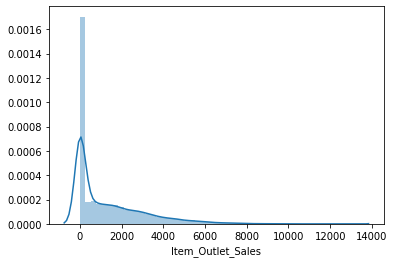

In [10]:
sns.distplot(data['Item_Outlet_Sales'])

Check the skewness and kurtosis of out target variable.
Skewness and kurtosis are two measurements of shape which can be used to check the normality. Skewness shows the symmetricity of the distribution. A perfectly symmetric data will have 0 skewness. Kurtosis shows the degree of peakness of the distribution. Kurtosis value of less than 1 indicates the data is too flat and kurtosis value greater than 1 indicates data is too peaked.
In this, the value of skewness is 1.5 and kurtosis is 2.4.
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
Here as the value of skewness is 1.5 we can make a conclusion that the variable is highly skewed.

In [11]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439



By the above skewness value it can be said that the target variable is highly skewed as value is much greater than 1. From the graph above we can understand that the variable is positively skewed as the data is towards the left and the tail is longer at the right end also known as right skewed. Kurtosis value is greater than 1 hence we can say the data is too peaked.

In [12]:
data['Outlet_Establishment_Year'].unique()
# These are the years in which outlets were
# established across

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
d=data['Outlet_Establishment_Year'].value_counts().rename_axis('Year').reset_index(name='No. of Outlets Established')
d.set_index("Year",inplace=True)
d

,No. of Outlets Established
Year,
1985,2439
1987,1553
1999,1550
1997,1550
2004,1550
2002,1548
2009,1546
2007,1543
1998,925


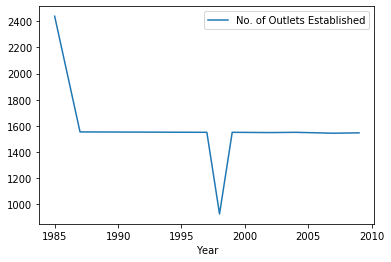

In [14]:
ax = sns.lineplot( data=d)


The above dataframe shows the year in which different outlets were established and the second column shows the number of oulets established that particular year. E.g.: in the year 1985, 2439 outlets were established in total and in the year 1998, 925 outlets were established.

### Univariant Analysis: 

This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes.

We are performing univariant analysis on our response variable which is Item_Outlet_Sales.

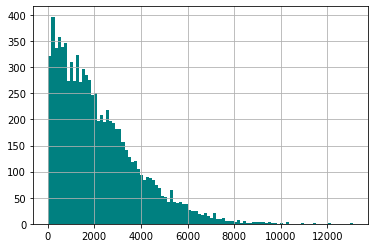

In [15]:
train['Item_Outlet_Sales'].hist(bins = 100, color="teal")

The distribution of the data is highly skewed, in this case positively skewed and transformation should be performed to treat the skeweness.

### Independent Variables (only numeric variables)
Visualization of the numeric independent variables. Histograms are used for visualizations, because that will help us in visualizing the distribution of the variables.

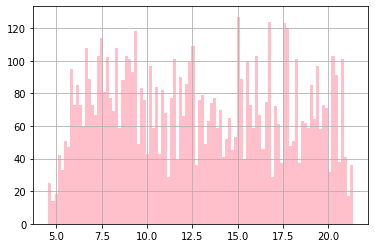

In [16]:
train['Item_Weight'].hist(bins = 100, color="pink");

There seems to be no definite trend in Item_Weight feature.

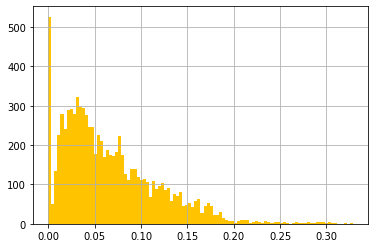

In [17]:
train['Item_Visibility'].hist(bins = 100,color="#FFC300")

Item_Visibility is right skewed and should be transformed to curb its skewness. This feature is positively skewed. And the data also shows that there are many 0's in the data, which needs to be treated.

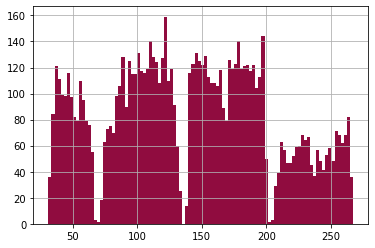

In [18]:
train['Item_MRP'].hist(bins = 100, color='#900C3F')

In the above graph as we can see there are 4 different distribution for this Item_MRP feature.

### Independent Variables (categorical variables)

Visualization of the categorical variables. A categorical variable or feature can have only a finite set of values.

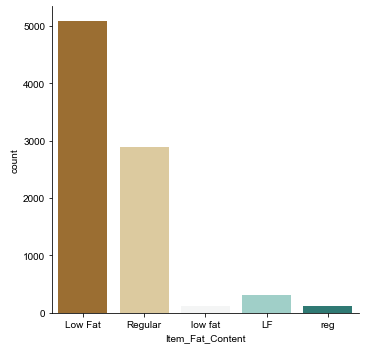

In [19]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train,palette="BrBG");
sns.set_style('darkgrid')
plt.show()

The seaborn catplot is used to plot categorical variables. So as seen in the above graph Low Fat, low fat and LF ate the same, so it would be better to combine them. The other two variables Regular and reg are the same, so combine them.

In [20]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

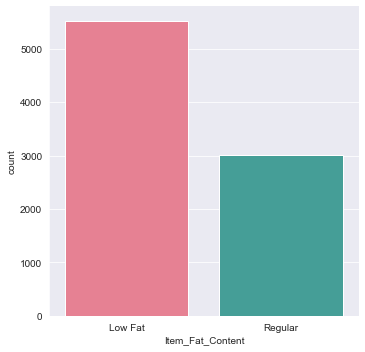

In [21]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train,palette="husl")

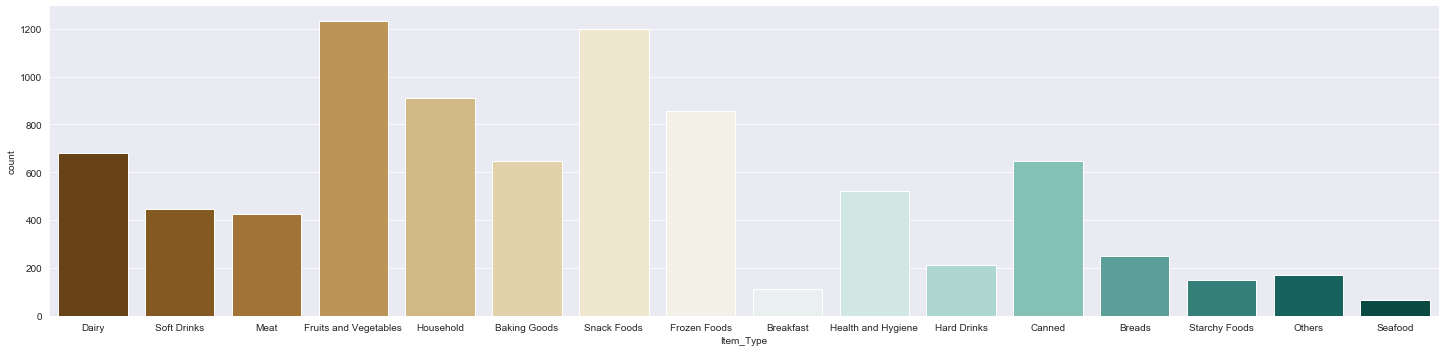

In [22]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =4,palette="BrBG")

From the above plot i.e. the item and their count it can be seen that most consumed or bought are fruits and veggies following snacks then household products and the least is seafood. 

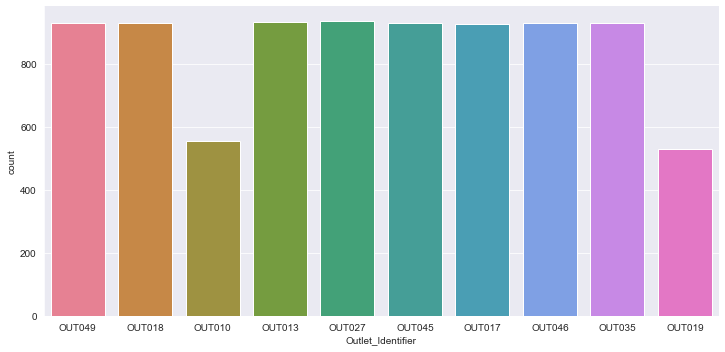

In [23]:
sns.catplot('Outlet_Identifier',kind = 'count',data = train,aspect = 2,palette="husl")

The above plot graphs the outlet count, the number of times products has been brought from the oulet. The least visited is Outlet 19. 

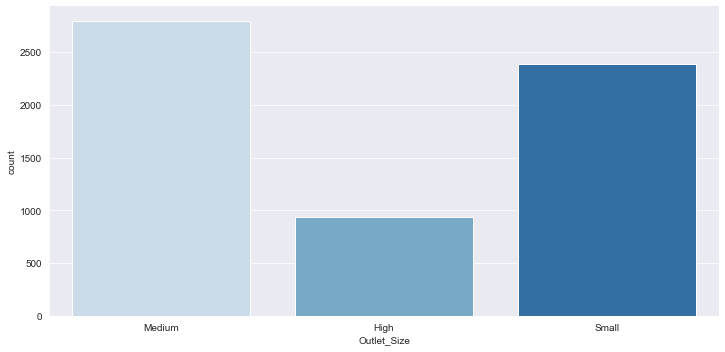

In [24]:
sns.catplot('Outlet_Size',kind = 'count',data = train,aspect = 2,palette="Blues")

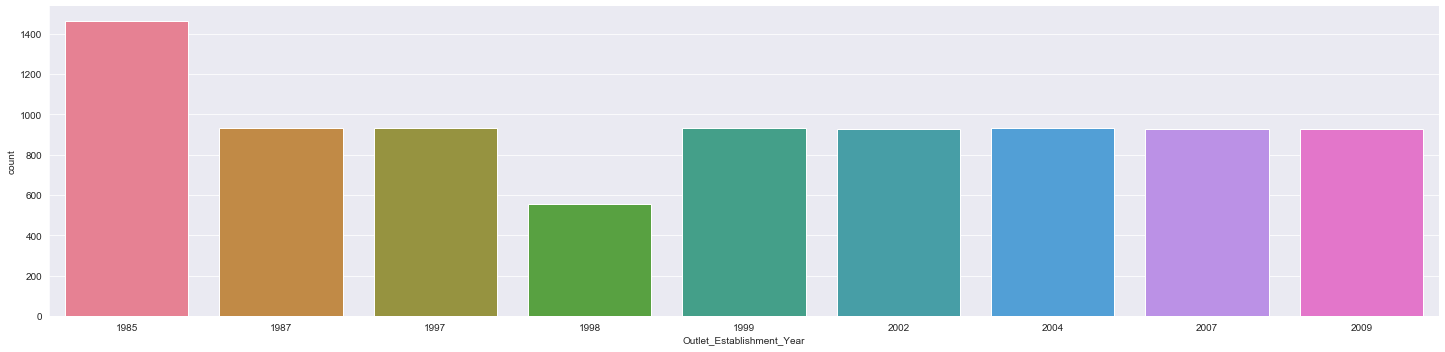

In [25]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =4,palette="husl")

This interpretation was made in the above line graph as well.
Less number of observations in the data for the outlets established in the year 1998 as compared to the other years.
That means less number of outlets were established in 1998 compared to the other outlets.

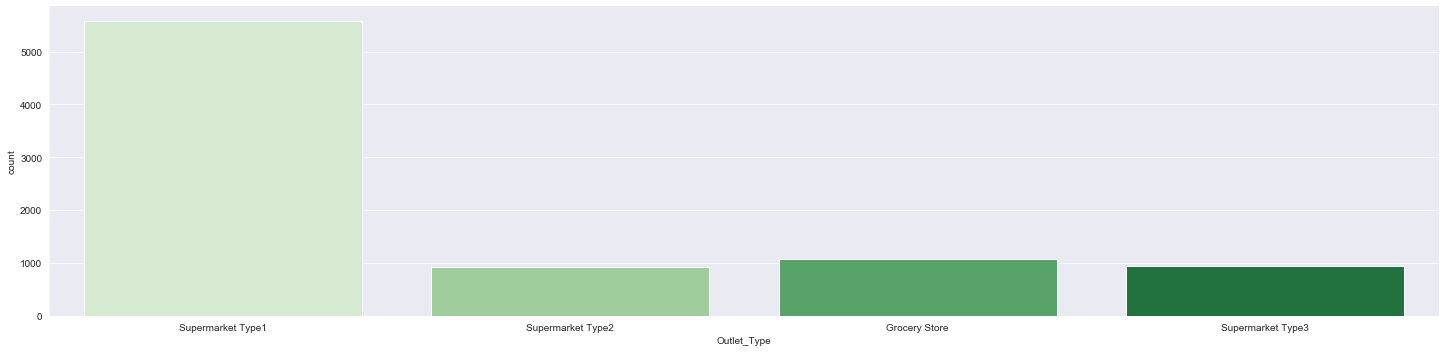

In [26]:
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =4, palette="Greens")

In this graph it can be seen that Super Market 1 is the most popular among other outlets.

### Target Variable vs Independent Numerical Variables

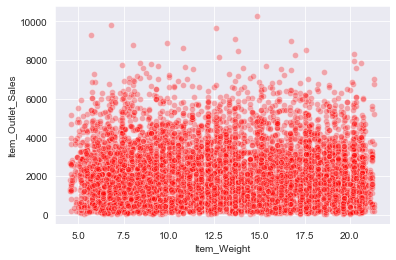

In [27]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3, color="red");

In the above plot no defining pattern can be seen. 

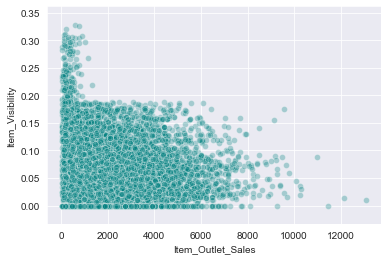

In [28]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3, color="teal")

Item_Visibility X Item_Outlet_Sales, in this scatter plot, data is cluttered at the origin i.e. at 0 and moves in a line like thread along the x and y axis 

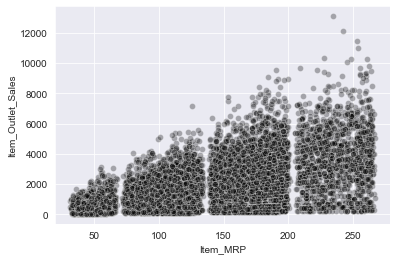

In [29]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3,color="black")

In the above graph, it can be clearly seen that there are 4 segments. These are price segments as shown sin one of the graphs above.

### Target Variable vs Independent Categorical Variables

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

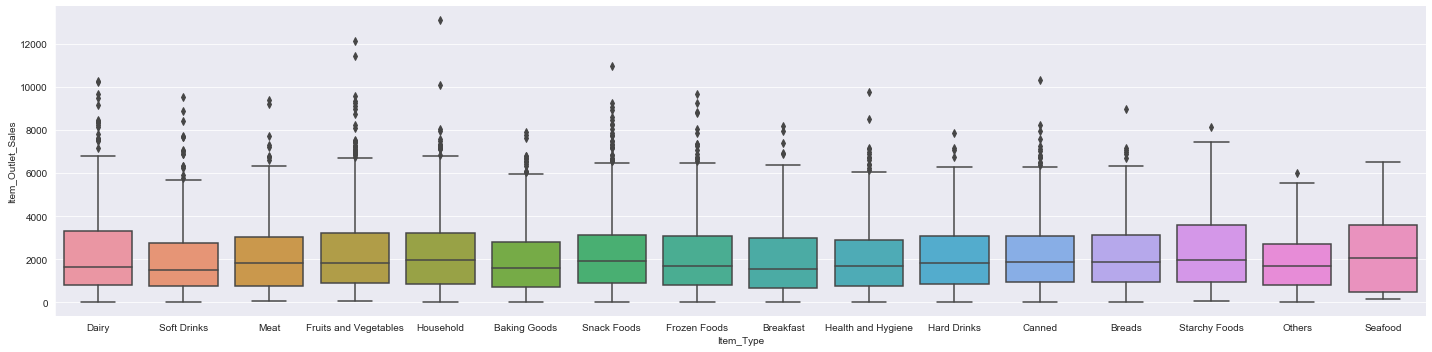

In [30]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'box',data = train,aspect=4)

The plot doesn't show much different for each of the category, the median seems to lie around the same range.

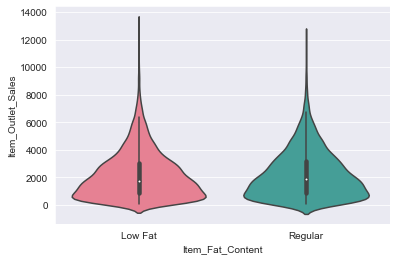

In [31]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train, palette="husl")

The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values. As the graph shows the density of data points between 0 to 2000 is higher.

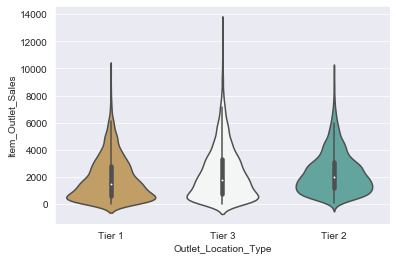

In [32]:
sns.violinplot('Outlet_Location_Type','Item_Outlet_Sales',data = train, palette="BrBG")

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar. The sales of all three tier lie between 0 to 2000.

# NaN ValuesTreatment

In [33]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

There are 1463 missing values in Item_Weight and 2410 missing values in Outlet_Size.

In [34]:
data.select_dtypes(include='object').head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train


There are 8 categorical columns

In [35]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
label = l_enc.fit_transform(train['Item_Identifier'])

In [36]:
label

array([ 156,    8,  662, ..., 1357,  681,   50])

In [37]:
train['Item_Weight'].fillna(label.mean(),inplace = True)

In [38]:
train.Item_Weight.isna().sum()

0

In [39]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [40]:
train['Outlet_Size'].isna().sum()

0

0 missing values! It means we have successfully imputed the missing data in the feature.

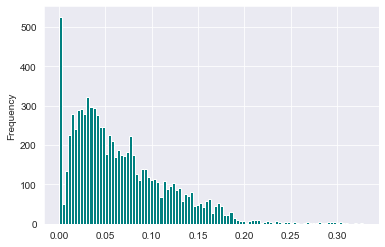

In [41]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100, color="teal")

In [42]:
train.shape

(8523, 13)

In [43]:
replace_0= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [44]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,replace_0)

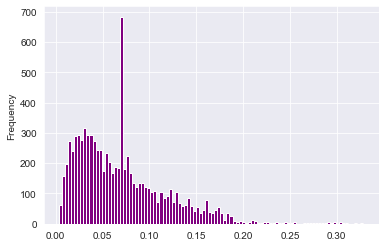

In [45]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100, color="purple")

### Feature Engineering

In [46]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

From the original column Item_Type divide the foods category into perishable and non.

In [47]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [48]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)
# NC is Non-Consumable

In [49]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


In [50]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [51]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [52]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [53]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In the scatter plot above for Item_Outlet_sales X Item_MRP we saw 4 different segments.

In [54]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [55]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

### Label encoding for the categorical variables

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
l = LabelEncoder()
train['Outlet_Size']= l.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = l.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = l.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = l.fit_transform(train['Item_MRP_Clusters'])

### One hot encoding for the categorical variable

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       8523 non-null object
Item_Type_new                8523 non-null object
Item_Category                8523 non-null object
Outlet_Years                 8523 non-null int64
Price_Per_Unit_Weight        8523 non-null float64
Item_MRP_Clusters            8523 non-null 

In [59]:
x= pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,x],axis = 1)

### Data Preprocessing

#### Removing Skewness

In [60]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

Correlation ranges from -1 to 1

If the correlation tends to 1 or is 1 that is highly correlated or positively correlated.

If the correlation tends to -1 or is -1 that is negatively correlated.

If correlation is zero 0 then no corrleation.

In [61]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,-0.061976,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,-0.016239,0.001699,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.039354,-0.012913,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.042096,-0.003787,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,-0.056826,0.028963,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.011359,0.005425,-0.016566,0.009441,-0.002312,-0.004385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Item_Type_new_not_sure,0.001699,-0.012913,-0.003787,0.028963,0.005425,0.000402,-0.004614,0.018100,-0.005425,0.003193,...,-0.006228,0.002164,0.003768,-0.000412,-0.463202,1.000000,-0.322369,-0.149661,0.175873,-0.090831
Item_Type_new_perishable,0.015956,0.052585,0.048058,0.037030,-0.016566,-0.007977,0.002475,0.024315,0.016566,-0.007846,...,0.015642,-0.015081,-0.000764,0.007042,-0.689617,-0.322369,1.000000,-0.102429,0.355441,-0.332921
Item_Category_DR,-0.014775,-0.257054,-0.000217,-0.051733,0.009441,0.003876,-0.005539,-0.034672,-0.009441,0.004486,...,-0.003055,0.011999,-0.003872,-0.011145,0.210390,-0.149661,-0.102429,1.000000,-0.514021,-0.154560
Item_Category_FD,0.010002,0.116740,0.071544,0.029315,-0.002312,-0.003544,-0.001713,0.031905,0.002312,0.002912,...,-0.005712,-0.003772,0.003433,0.008406,-0.467322,0.175873,0.355441,-0.514021,1.000000,-0.768023


### Model Building

### Train - Validation Split

In [62]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [1]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

NameError: name 'X_train' is not defined

In [66]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
4325,13.00,0,-1.873283,79.6986,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,0,1,0
246,12.00,0,-3.382979,179.3976,1987,0,2,32,2.704698,2,...,0,1,0,0,1,0,0,0,1,0
22,14.60,1,-3.661337,196.5084,2004,2,1,15,2.599684,2,...,0,1,0,0,1,0,0,0,0,1
4612,15.50,2,-2.065209,262.1568,1998,2,2,21,2.828103,3,...,1,0,0,0,1,0,0,0,1,0
1894,15.35,0,-4.280608,62.7168,1999,1,0,20,1.407514,0,...,0,1,0,0,1,0,0,0,1,0


### Multiple Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [69]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [70]:
y_pred = model.predict(X_valid)

In [71]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,y_pred))

Mean Absolute Error:  805.7051764429845
Mean Squared Error:  1148956.4608128513
Root Mean Squared Error:  1071.893866393894
Explained Variance Score:  0.6446132320477456


In [72]:
print("Train Score: ",model.score(X_train,y_train))
print("Validation Score: ",model.score(X_valid,y_valid))

Train Score:  0.6327517228609575
Validation Score:  0.641608336642878


### XGBOOST REGRESSOR

In [73]:
# pip install xgboost

In [74]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_valid = XGB.predict(X_valid)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions))

In [ ]:
XGB.score(X_train,y_train),XGB.score(X_valid,y_valid)

# Random forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
predictions1=rf.predict(X_valid)


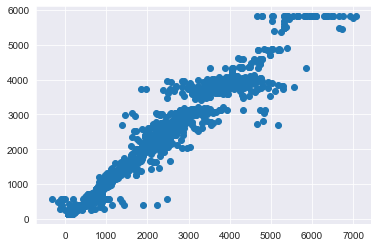

In [80]:
plt.scatter(y_valid,predictions1)

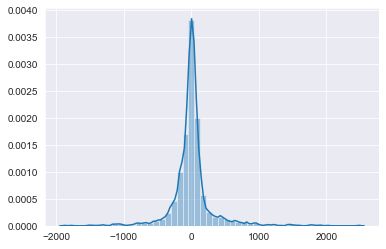

In [81]:
import seaborn as sns
sns.distplot((y_valid-predictions1))

In [82]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions1))


Mean Absolute Error:  167.73874104232942
Mean Squared Error:  95000.29206510278
Root Mean Squared Error:  308.221173940245
Explained Variance Score:  0.9485978386729732


In [83]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_valid, y_valid)
rf.score(X_valid, y_valid)
print("Accuracy of random forest model",rf.score(X_valid, y_valid))

Accuracy of random forest model 0.9942141125648196


In [84]:
rf.score(X_valid, y_valid),rf.score(X_train, y_train)

(0.9942141125648196, 0.6234529138062403)

# SVR (Support Vector Regressor)

In [85]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
SupportVectorRegModel=SVR(kernel='linear')
SupportVectorRegModel.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
sv_pred=SupportVectorRegModel.predict(X_valid)

In [88]:
MSE=mean_squared_error(y_valid,sv_pred)
print("MSE:",MSE)

MSE: 405982.7048564295


In [89]:
RMSE=np.sqrt(MSE)
print(RMSE)

637.1677211350474


In [90]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,sv_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,sv_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,sv_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,sv_pred))


Mean Absolute Error:  400.7538190704238
Mean Squared Error:  405982.7048564295
Root Mean Squared Error:  637.1677211350474
Explained Variance Score:  0.7921812266464097


In [91]:
SupportVectorRegModel.score(X_valid, y_valid),SupportVectorRegModel.score(X_train, y_train)

(0.7802404815892073, 0.4964233629191786)